<a href="https://colab.research.google.com/github/laume/ML-LifeExpectancy/blob/master/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare environment

In [0]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving kaggle-3.json to kaggle-3.json


In [5]:
!mv kaggle-3.json kaggle.json
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Aug  8 07:08 kaggle.json


In [0]:
def setup_kaggle():
    x = !ls kaggle.json
    assert x == ['kaggle.json'], 'Upload kaggle.json'
    !mkdir ~/.kaggle
    !mv kaggle.json ~/.kaggle
    !chmod 600 ~/.kaggle/kaggle.json

In [0]:
setup_kaggle()

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
!pip install tensorflow-gpu==2.0.0-beta1

import tensorflow as tf

     |████████████████████████████████| 348.9MB 49kB/s 
     |████████████████████████████████| 501kB 39.4MB/s 
     |████████████████████████████████| 3.1MB 29.1MB/s 


In [9]:
tf.__version__

'2.0.0-beta1'

In [0]:
%load_ext autoreload
%autoreload 2

In [11]:
!pip install --upgrade --quiet toai-mokahaiku

     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 296kB 8.6MB/s 


In [12]:
import toai
toai.__version__

'0.0.14'

In [13]:
from toai.imports import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
DATA_DIR = Path('.data/houses')
TEMP_DIR = Path('.temp/houses')

In [0]:
import os

In [0]:
os.makedirs(TEMP_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

In [17]:
DOWNLOAD_DATA = True

if DOWNLOAD_DATA:
    !kaggle competitions download -c house-prices-advanced-regression-techniques -p {str(DATA_DIR)}

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 29.3MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.5MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.1MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.3MB/s]


In [18]:
!ls -la .data/houses

total 952
drwxr-xr-x 2 root root   4096 Aug  8 07:09 .
drwxr-xr-x 3 root root   4096 Aug  8 07:09 ..
-rw-r--r-- 1 root root  13370 Aug  8 07:09 data_description.txt
-rw-r--r-- 1 root root  31939 Aug  8 07:09 sample_submission.csv
-rw-r--r-- 1 root root 451405 Aug  8 07:09 test.csv
-rw-r--r-- 1 root root 460676 Aug  8 07:09 train.csv


### House Prices: Advanced Regression Techniques


https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


## Explore data

In [0]:
train = pd.read_csv(str(DATA_DIR/'train.csv'))

In [20]:
train.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [232]:
[(x, train_data[x].nunique()) for x in train_data.columns if x in cat_cols]

[('MSSubClass', 15),
 ('MSZoning', 5),
 ('LotFrontage', 99),
 ('LotArea', 696),
 ('Street', 2),
 ('Alley', 2),
 ('LotShape', 4),
 ('LandContour', 4),
 ('Utilities', 2),
 ('LotConfig', 5),
 ('LandSlope', 3),
 ('Neighborhood', 25),
 ('Condition1', 9),
 ('Condition2', 6),
 ('BldgType', 5),
 ('HouseStyle', 8),
 ('OverallQual', 10),
 ('OverallCond', 9),
 ('RoofStyle', 6),
 ('RoofMatl', 7),
 ('Exterior1st', 14),
 ('Exterior2nd', 16),
 ('MasVnrType', 4),
 ('MasVnrArea', 236),
 ('ExterQual', 4),
 ('ExterCond', 5),
 ('Foundation', 6),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('BsmtFinType1', 6),
 ('BsmtFinSF1', 455),
 ('BsmtFinType2', 6),
 ('BsmtFinSF2', 82),
 ('BsmtUnfSF', 569),
 ('TotalBsmtSF', 517),
 ('Heating', 6),
 ('HeatingQC', 4),
 ('CentralAir', 2),
 ('Electrical', 4),
 ('BsmtFullBath', 4),
 ('BsmtHalfBath', 3),
 ('FullBath', 4),
 ('HalfBath', 3),
 ('BedroomAbvGr', 8),
 ('KitchenAbvGr', 3),
 ('KitchenQual', 4),
 ('TotRmsAbvGrd', 12),
 ('Functional', 7),
 ('Fireplaces',

In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [23]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [24]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

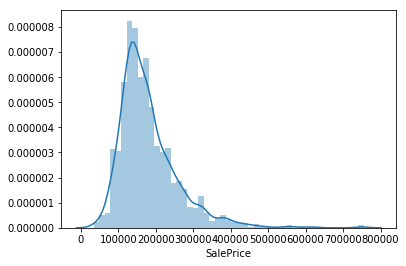

In [25]:
# Price distribution
sns.distplot(train.SalePrice);

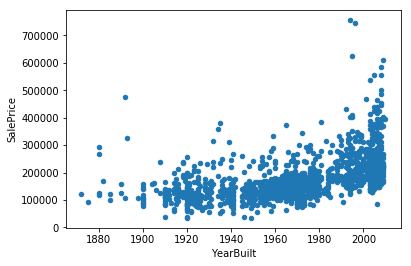

In [26]:
# year_made/saleprice
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
data.plot.scatter(x='YearBuilt', y='SalePrice');

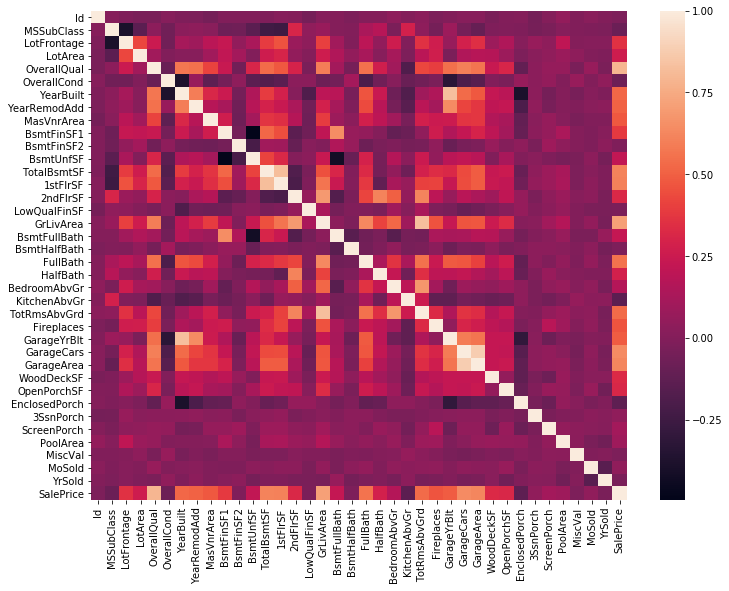

In [27]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr());

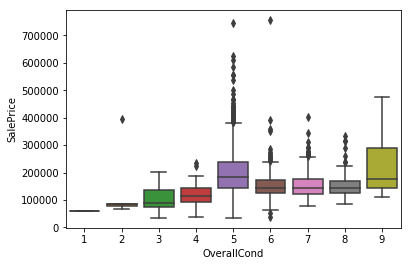

In [28]:
# overall_condition/saleprice
data = pd.concat([train['SalePrice'], train['OverallCond']], axis=1)
sns.boxplot(x='OverallCond', y='SalePrice', data=data);

In [61]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
target_col='SalePrice'
    
cat_cols=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition',
    ]
    
cont_cols=[
    'YearBuilt', 'YearRemodAdd',
    '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea',
    'GarageYrBlt', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 
    'ScreenPorch', 'PoolArea', 
    'YrSold',
]

## Helper functions

In [0]:
def split_df(data, test_size, target_col=None, random_state=42):
    if target_col:
        stratify = data[target_col]
    else:
        stratify = None
    train_data, test_data = train_test_split(
        data, test_size=test_size, stratify=stratify, random_state=random_state
    )
    if target_col:
        test_stratify = test_data[target_col]
    else:
        test_stratify = None
    val_data, test_data = train_test_split(
        test_data,
        test_size=0.5,
        stratify=test_stratify,
        random_state=random_state,
    )
    for df in train_data, val_data, test_data:
        df.reset_index(drop=True, inplace=True)
    return train_data, val_data, test_data

In [0]:
class DataParams:
    def __init__(self, target_col, cat_cols=None, cont_cols=None, text_cols=None):
        self.target_col = target_col
        self.feature_cols = cat_cols + cont_cols
        self.cat_cols = cat_cols
        self.cont_cols = cont_cols
        self.text_cols = text_cols

In [0]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin


class NumericInputer(BaseEstimator, TransformerMixin):
    IMPLEMENTED_STRATEGIES = {"median": np.nanmedian, "mean": np.nanmean}

    def __init__(self, columns=None, strategy="median", suffix="_na"):
        if strategy not in self.IMPLEMENTED_STRATEGIES:
            raise NotImplementedError("This strategy is not implemented.")
        self.strategy = strategy
        self.columns = columns
        self.suffix = suffix

    def fit(self, data):
        self.statistics_ = {
            column: self.IMPLEMENTED_STRATEGIES[self.strategy](data[column])
            for column in self.columns or data.columns
        }
        return self

    def transform(self, data):
        data = data.copy()
        for column in self.statistics_:
            data.insert(
                data.columns.get_loc(column) + 1,
                column + self.suffix,
                data[column].isna().astype(int),
            )
            data[column].fillna(value=self.statistics_[column], inplace=True)
        return data

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin


class CategoricalInputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, suffix="_na"):
        self.columns = columns
        self.suffix = suffix

    def fit(self, data):
        self.statistics_ = {
            column: data[column].mode().values[0] for column in self.columns or data.columns
        }
        return self

    def transform(self, data):
        data = data.copy()
        for column in self.statistics_:
            data.insert(
                data.columns.get_loc(column) + 1,
                column + self.suffix,
                data[column].isna().astype(int),
            )
            data[column].fillna(value=self.statistics_[column], inplace=True)
        return data

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin


class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, data):
        data = data.astype('category')
        self.categories_ = {
            column: dict(enumerate(data[column].cat.categories, 1)) for column in self.columns or data.columns
        }
        return self

    def transform(self, data):
        data = data.copy()
        for column in self.categories_:
            data[column] = data[column].map({value: key for key, value in self.categories_[column].items()}).fillna(value=0).astype(int)
        return data

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin


class Extractor(BaseEstimator, TransformerMixin):
    def __init__(self, source_column, patterns, drop_source=False):
        self.patterns = patterns
        self.source_column = source_column
        self.drop_source = drop_source

    def fit(self, data):
        return self

    def transform(self, data):
        data = data.copy()
        col_index = data.columns.get_loc(self.source_column)
        for i, (column, pattern) in enumerate(self.patterns.items(), 1):
            data.insert(
                col_index + i,
                column,
                data[self.source_column].str.extract(pattern),
            )
        if self.drop_source:
            data.drop(self.source_column, axis=1)
        return data

In [0]:
def evaluate_pipeline(pipeline, datasets, label_pipeline, preprocess_pipeline, metrics):
    results = []
    for i, (data, labels) in enumerate(datasets):
        prep_data = preprocess_pipeline.transform(data)
        prep_labels = label_pipeline.transform(labels)
        preds = label_pipeline.inverse_transform(pipeline.predict(prep_data).reshape(-1, 1))
        results.append({metric.__name__: metric(labels, preds) for metric in metrics})
    return results

## Transformations

In [0]:
# try nicer method
data_params = DataParams(
    target_col=target_col,
    cat_cols=cat_cols,
    cont_cols=cont_cols,
)

In [0]:
train_data, val_data, test_data = split_df(train, 0.4)

In [35]:
train_data.shape

(876, 81)

In [36]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,315,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1925,1990,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,LwQ,16,Unf,0,712,728,GasA,...,Y,SBrkr,832,809,0,1641,0,1,1,1,3,1,Ex,6,Typ,1,Gd,Detchd,1925.0,Unf,2,546,Fa,TA,Y,0,0,234,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,178000
1,443,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,7,1930,1992,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,1078,1078,GasA,...,Y,SBrkr,1128,445,0,1573,0,0,2,0,3,1,TA,8,Typ,1,Gd,Detchd,1930.0,Unf,2,360,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,162900
2,320,80,RL,NaN,14115,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,7,5,1980,1980,Gable,CompShg,Plywood,Plywood,BrkFace,225.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,336,1372,GasA,...,Y,SBrkr,1472,0,0,1472,1,0,2,0,3,1,TA,6,Typ,2,TA,Attchd,1980.0,Unf,2,588,TA,TA,Y,233,48,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,187500
3,768,50,RL,75.0,12508,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,6,7,1940,1985,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,660,Unf,0,323,983,GasA,...,Y,SBrkr,983,767,0,1750,1,0,2,0,4,1,TA,7,Mod,0,NaN,Attchd,1989.0,Unf,1,423,TA,TA,Y,245,0,156,0,0,0,NaN,NaN,Shed,1300,7,2008,WD,Normal,160000
4,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,20,Unf,0,846,866,GasA,...,Y,SBrkr,866,902,0,1768,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,578,TA,TA,Y,144,105,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000


In [0]:
cat_pipeline = Pipeline([
    ('imputer', CategoricalInputer()),
    ('encoder', CategoricalEncoder()),
])

In [0]:
num_pipeline = Pipeline([
    ('imputer', NumericInputer()),
    ('scaler', RobustScaler()),
])

In [0]:
preprocess_pipeline_num = ColumnTransformer([
    ("num", num_pipeline, data_params.cont_cols),
])
preprocess_pipeline_cat = ColumnTransformer([
    ("cat", cat_pipeline, data_params.cat_cols),
])

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, data_params.cont_cols),
    ("cat", cat_pipeline, data_params.cat_cols),
])

In [0]:
label_pipeline = Pipeline([
    ('scaler', RobustScaler()),
])

In [0]:
train_labels = train_data[[data_params.target_col]]

In [0]:
prep_train_data_cont = preprocess_pipeline_num.fit_transform(train_data[data_params.cont_cols])
prep_train_data_cat = preprocess_pipeline_cat.fit_transform(train_data[data_params.cat_cols])

In [0]:
prep_train_data = preprocess_pipeline.fit_transform(train_data[data_params.feature_cols])

In [69]:
prep_train_data_cont.shape, prep_train_data_cat.shape

((876, 30), (876, 128))

In [70]:
prep_train_data_full = np.concatenate((
        prep_train_data_cont,
        prep_train_data_cat,
    ),
    axis=1,
)
prep_train_data_full.shape

(876, 158)

In [0]:
prep_train_labels = label_pipeline.fit_transform(train_labels).reshape(-1)

In [0]:
val_labels = val_data[[data_params.target_col]]

In [73]:
prep_val_data_cont = preprocess_pipeline_num.transform(val_data[data_params.cont_cols])
prep_val_data_cat = preprocess_pipeline_cat.transform(val_data[data_params.cat_cols])
prep_val_data_full = np.concatenate((
        prep_val_data_cont,
        prep_val_data_cat,
    ),
    axis=1,
)
print(prep_val_data_cont.shape, prep_val_data_cat.shape, prep_val_data_full.shape)
prep_val_data = preprocess_pipeline.transform(val_data[data_params.feature_cols])
prep_val_data.shape

(292, 30) (292, 128) (292, 158)


(292, 158)

In [0]:
prep_val_labels = label_pipeline.transform(val_data[[data_params.target_col]]).reshape(-1)

## Check Random Forest

In [0]:
rs_rf = RandomizedSearchCV(
    estimator=Pipeline([
        ("rf", RandomForestRegressor(n_estimators=300)),
    ]),
    param_distributions={
        'rf__max_depth': np.arange(10, 1000),
        'rf__min_samples_leaf': np.arange(3, 20, 3),
        'rf__max_features': ['sqrt', 'log2', 0.2],
        'rf__min_samples_split': np.arange(2, 20),
        'rf__min_samples_leaf': np.arange(1, 10),
    },
    n_iter=200,
    cv=3,
    n_jobs=-1,
    verbose=1,
)

In [79]:
rs_rf.fit(prep_train_data, prep_train_labels)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('rf',
                                              RandomForestRegressor(bootstrap=True,
                                                                    criterion='mse',
                                                                    max_depth=None,
                                                                    max_features='auto',
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
                                                                    min_samples_leaf=1,
                                                                    min_samples_split=2,
                                           

In [80]:
evaluate_pipeline(
    pipeline=rs_rf,
    datasets=[[train_data, train_labels], [val_data, val_labels]],
    label_pipeline=label_pipeline,
    preprocess_pipeline=preprocess_pipeline,
    metrics=[mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score],
)

[{'explained_variance_score': 0.9610303262114396,
  'mean_absolute_error': 8181.6588766181685,
  'mean_squared_error': 221237367.53342438,
  'mean_squared_log_error': 0.005998754748712262},
 {'explained_variance_score': 0.7795152950672903,
  'mean_absolute_error': 24299.717200075956,
  'mean_squared_error': 2231084049.7902594,
  'mean_squared_log_error': 0.03388825172010316}]

## NN model

In [94]:
d = np.array([[3, 3]])
print(d.T.shape)
c = np.concatenate((c, d.T), axis = 1)
c

(2, 1)


array([[1, 2, 5, 3],
       [3, 4, 6, 3]])

In [98]:
df = pd.DataFrame.from_records(c)
df[0]

0    1
1    3
Name: 0, dtype: int64

In [101]:
prep_train_data_cat.shape

(876, 128)

In [102]:
df_train_cat = pd.DataFrame.from_records(prep_train_data_cat)
df_train_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,7,1,5,1,29,1,332,1,2,1,1,1,4,1,4,1,1,1,5,1,1,1,18,1,3,1,3,1,1,1,6,1,7,1,7,1,2,1,2,1,...,4,1,2,1,1,1,5,1,7,1,2,1,3,1,6,1,3,1,3,1,2,1,5,1,3,1,3,2,3,2,2,2,1,1,8,1,9,1,5,1
1,5,1,5,1,21,1,102,1,2,1,1,2,4,1,4,1,1,1,5,1,1,1,4,1,3,1,3,1,1,1,1,1,5,1,7,1,2,1,2,1,...,4,1,2,1,4,1,7,1,7,1,2,1,3,1,6,1,3,1,3,1,5,1,5,1,2,1,3,2,3,2,2,2,1,1,6,1,9,1,5,1
2,9,1,4,1,29,2,597,1,2,1,1,2,4,1,4,1,1,1,5,1,1,1,15,1,3,1,3,1,1,1,8,1,7,1,5,1,2,1,2,1,...,4,1,2,1,4,1,5,1,7,1,3,1,5,1,2,1,3,1,3,1,5,1,5,1,3,1,3,2,3,2,2,2,1,1,6,1,9,1,5,1
3,5,1,4,1,44,1,552,1,2,1,1,2,1,1,4,1,1,1,5,1,1,1,12,1,3,1,3,1,1,1,1,1,6,1,7,1,2,1,2,1,...,5,1,2,1,4,1,6,1,5,1,1,1,3,2,2,1,3,1,2,1,5,1,5,1,3,1,3,2,3,2,2,1,11,1,7,1,9,1,5,1
4,6,1,4,1,37,1,433,1,2,1,1,2,1,1,4,1,1,1,5,1,1,1,6,1,3,1,3,1,1,1,6,1,8,1,5,1,2,1,2,1,...,4,1,2,1,3,1,6,1,7,1,1,1,3,2,2,1,2,1,3,1,5,1,5,1,3,1,3,2,3,2,2,2,1,1,4,1,9,1,5,1


In [0]:
cat_features_dims = {cat_col: len(np.unique(df_train_cat[cat_col])) + 200 for cat_col in df_train_cat.columns}

In [133]:
len(cat_features_dims)

128

In [175]:
prep_train_data_full.shape[1:]

(158,)

In [0]:
def make_embedding_model(
    cat_features_dims,
    n_cont_features,
    n_classes,
    layer_size,
    dropout_rate=0.0,
    n_layers=1,
    final_activation='softmax',
    regularization=None,
    batch_norm=True,
):
    inputs = []
    embeddings = []
    
    for cat_features_dim in cat_features_dims.values():
        x = keras.layers.Input(shape=(1,))
        inputs.append(x)
        x = keras.layers.Embedding(
            cat_features_dim + 1,
            np.sqrt(cat_features_dim).astype(int),
            input_length=1,
            embeddings_regularizer=keras.regularizers.l1_l2(1e-2, 1e-2),
        )(x)
        x = keras.layers.Flatten()(x)
        embeddings.append(x)
         
    cont_inputs = keras.layers.Input(shape=(n_cont_features,))
    inputs.append(cont_inputs)
    embeddings.append(cont_inputs)
    
    x = keras.layers.Concatenate()(embeddings)
    
    for _ in range(n_layers):
        if batch_norm:
            x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Dense(
                layer_size,
                kernel_initializer='he_uniform',
                kernel_regularizer=regularization and keras.regularizers.l1_l2(*regularization),
            )(x)
           
        x = keras.layers.LeakyReLU()(x)
        x = keras.layers.Dropout(dropout_rate)(x)
        
    x = keras.layers.Dense(n_classes, activation=final_activation)(x)
    return keras.Model(inputs=inputs, outputs=x)

In [218]:
prep_train_data_cont.shape[1], prep_train_data_cat.shape

(30, (876, 128))

In [0]:
embedding_model = make_embedding_model(
    cat_features_dims,
    prep_train_data_cont.shape[1],
    n_classes=1,
    layer_size=64,
    dropout_rate=0.4,
    regularization=(1e-5, 3e-3),
    n_layers=3,
    final_activation=None
)

In [0]:
embedding_model.compile(
   optimizer=keras.optimizers.RMSprop(1e-3),
   loss=keras.losses.mean_squared_error,
   metrics=[
       keras.metrics.mean_squared_error,
       keras.metrics.mean_absolute_error,
   ],
)

In [221]:
prep_train_data_full.shape, prep_train_labels.shape, prep_val_data_full.shape, prep_val_labels.shape

((876, 158), (876,), (292, 158), (292,))

In [222]:
type(prep_train_data_full), type(prep_train_labels), type(prep_val_data_full), type(prep_val_labels)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [0]:
# df_train = pd.DataFrame.from_records(prep_train_data_full)
# df_val = pd.DataFrame.from_records(prep_val_data_full)

In [0]:
df_train_cat = pd.DataFrame.from_records(prep_train_data_cat)
df_val_cat = pd.DataFrame.from_records(prep_val_data_cat)
df_train_cont = pd.DataFrame.from_records(prep_train_data_cont)
df_val_cont = pd.DataFrame.from_records(prep_val_data_cont)

In [225]:
df_train_cat.shape, df_train_cont.shape

((876, 128), (876, 30))

In [226]:
emb_train_data = [df_train_cat[x] for x in df_train_cat] + [df_train_cont]
emb_val_data = [df_val[x] for x in df_val_cat] + [df_val_cont]
len(emb_train_data), len(emb_val_data)

(129, 129)

In [215]:
[(df_train_cat[x].min(), df_train_cat[x].max()) for x in df_train_cat]

[(1, 15),
 (1, 1),
 (1, 5),
 (1, 1),
 (1, 99),
 (1, 2),
 (1, 696),
 (1, 1),
 (1, 2),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 4),
 (1, 1),
 (1, 4),
 (1, 1),
 (1, 2),
 (1, 1),
 (1, 5),
 (1, 1),
 (1, 3),
 (1, 1),
 (1, 25),
 (1, 1),
 (1, 9),
 (1, 1),
 (1, 6),
 (1, 1),
 (1, 5),
 (1, 1),
 (1, 8),
 (1, 1),
 (1, 10),
 (1, 1),
 (1, 9),
 (1, 1),
 (1, 6),
 (1, 1),
 (1, 7),
 (1, 1),
 (1, 14),
 (1, 1),
 (1, 16),
 (1, 1),
 (1, 4),
 (1, 2),
 (1, 236),
 (1, 2),
 (1, 4),
 (1, 1),
 (1, 5),
 (1, 1),
 (1, 6),
 (1, 1),
 (1, 4),
 (1, 2),
 (1, 4),
 (1, 2),
 (1, 4),
 (1, 2),
 (1, 6),
 (1, 2),
 (1, 455),
 (1, 1),
 (1, 6),
 (1, 2),
 (1, 82),
 (1, 1),
 (1, 569),
 (1, 1),
 (1, 517),
 (1, 1),
 (1, 6),
 (1, 1),
 (1, 4),
 (1, 1),
 (1, 2),
 (1, 1),
 (1, 4),
 (1, 2),
 (1, 4),
 (1, 1),
 (1, 3),
 (1, 1),
 (1, 4),
 (1, 1),
 (1, 3),
 (1, 1),
 (1, 8),
 (1, 1),
 (1, 3),
 (1, 1),
 (1, 4),
 (1, 1),
 (1, 12),
 (1, 1),
 (1, 7),
 (1, 1),
 (1, 4),
 (1, 1),
 (1, 5),
 (1, 2),
 (1, 6),
 (1, 2),
 (1, 3),
 (1, 2),
 (1, 5),
 (1, 1),
 (1, 5),
 

In [169]:
# we have to change training data, because its not shaped properly
emb_train_data_cat = [df_train_cat[x] for x in df_train_cat]
emb_train_data_cont = [df_train_cont[x] for x in df_train_cont]
emb_val_data_cat = [df_val_cat[x] for x in df_val_cat]
emb_val_data_cont = [df_val_cont[x] for x in df_val_cont]
len(emb_train_data_cat), len(emb_train_data_cont)

(128, 30)

In [227]:
PATIENCE = 10
embedding_model_history = embedding_model.fit(
   emb_train_data,
   prep_train_labels,
   validation_data = (emb_val_data, prep_val_labels),
   batch_size=32,
   epochs=100,
   callbacks=[
       keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'embedding_model.h5'), save_best_only=True),
       keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=PATIENCE),
       keras.callbacks.EarlyStopping(patience=PATIENCE * 3, restore_best_weights=True),
       keras.callbacks.TensorBoard(log_dir=str(TEMP_DIR/"embedding_model_logs")),
   ],
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 876 samples, validate on 292 samples
Epoch 1/100
 32/876 [>.............................] - ETA: 3:22 - loss: 121.2793 - mean_squared_error: 4.6656 - mean_absolute_error: 1.7189

W0808 15:21:31.383293 140483565262720 callbacks.py:241] Method (on_train_batch_end) is slow compared to the batch update (0.153762). Check your callbacks.


832/876 [===========================>..] - ETA: 0s - loss: 55.2366 - mean_squared_error: 3.0342 - mean_absolute_error: 1.3474

InvalidArgumentError: ignored

In [138]:
embedding_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_130 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_131 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_132 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_133 (InputLayer)          [(None, 1)]          0                                            
____________________________________________________________________________________________